# Demonstration for each model

### General Settings and Import Libraries

*Instruction: please change the file path of the models*
- You should change the suitable path of the trained model directories or files.
- For the Deep bidirectional LSTM and GRU testing, the saved-model directory are `trained_dbgru`, `trained_dblstm`.
- For the PhoBERT model, the saved model is the `trained_Bertmodel` directory.
- For the XLM-RoBERTs model, the saved-model file is `model_max_weighted_f1.pth`, the file path is also up to you.

In [1]:
import pprint
import numpy as np
import pandas as pd
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
from tqdm import tqdm

from sklearn import preprocessing, metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import torch
from torch import Tensor
from torch.utils.data import DataLoader
from torch.optim import AdamW

import torchtext
import torchtext.transforms as T
import torchtext.functional as F
from torchtext.models import RobertaClassificationHead, XLMR_BASE_ENCODER


import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers

from transformers import RobertaModel, RobertaConfig, RobertaTokenizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, AutoModel
from datasets import load_dataset, load_metric

c:\Users\DELL\Programming\python\StockReview.IntroAI.20222\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. DBGRU

In [2]:
dbgru = tf.keras.models.load_model('output/trained_dbgru') #manually change the path suitable for training

In [3]:
dbgru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, None, 128)         291712    
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 128)        74496     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                      

In [4]:
label_mapping = {
    0: 'positive',
    1: 'negative',
    2: 'neutral'
}
sample_text = 'Tính chung cả tuần, VN-Index có 4 phiên tăng và 1 phiên giảm, tích lũy 27 điểm so với tuần trước. Thanh khoản thị trường được cải thiện đáng kể so với khoảng ba tháng trở lại đây khi không ghi nhận phiên nào dưới 13.500 tỷ đồng.'

1/1 [==============================] - 9s 9s/step


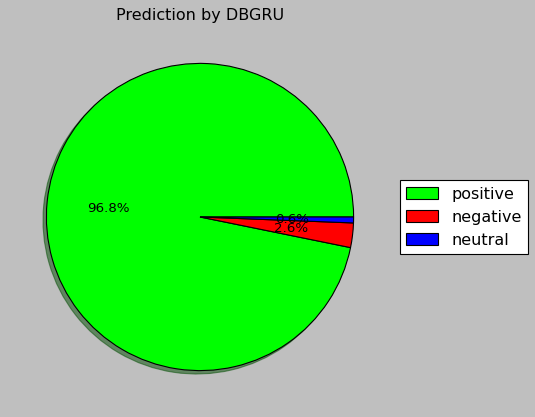

In [5]:
prediction = dbgru.predict([input()])[0]
predicted_probs = prediction.tolist()
labeling = [label_mapping[i] for i in range(len(predicted_probs))]
colors = ['#00FF00', '#FF0000', '#0000FF'] #RGB

plt.pie(predicted_probs, autopct='%1.1f%%', colors=colors, shadow=True)
color_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(color_patches, labeling, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Prediction by DBGRU')
plt.show()

## 2. DBLSTM

In [6]:
dblstm = tf.keras.models.load_model('output/trained_dblstm') #manually change the path suitable for training

In [7]:
dblstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 128)         291712    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                        

In [8]:
label_mapping = {
    0: 'positive',
    1: 'negative',
    2: 'neutral'
}
sample_text = 'Báo động nợ xấu ở một số ngân hàng'

1/1 [==============================] - 0s 55ms/step


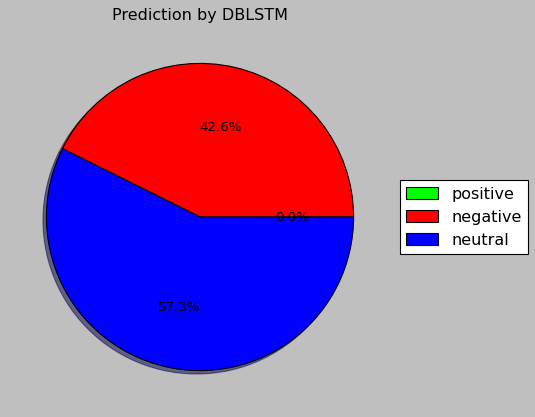

In [15]:
prediction = dblstm.predict([input()])[0]
predicted_probs = prediction.tolist()
labeling = [label_mapping[i] for i in range(len(predicted_probs))]
colors = ['#00FF00', '#FF0000', '#0000FF'] #RGB

plt.pie(predicted_probs, autopct='%1.1f%%', colors=colors, shadow=True)
color_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]
plt.legend(color_patches, labeling, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Prediction by DBLSTM')
plt.show()

## 3. phoBERT

In [30]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")
phoBERTmodel = AutoModelForSequenceClassification.from_pretrained('output/trained_Bertmodel')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [31]:
phoBERTmodel.config.from_pretrained('output/trained_Bertmodel/config.json')

RobertaConfig {
  "_name_or_path": "vinai/phobert-base",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 258,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "PhobertTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.29.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 64001
}

In [32]:
phoBERTmodel.eval()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [33]:
sample_text = 'Báo động nợ xấu tăng ở một số ngân hàng'
inputs = tokenizer(input(), padding=True, truncation=True, return_tensors="pt")

with torch.no_grad():
    outputs = phoBERTmodel(**inputs)

predictions = outputs.logits
print(predictions)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tensor([[-1.8824,  5.5815, -3.4407]])


## 4. XLM - RoBERTa

In [13]:
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [14]:
def prepare_xlmroberta_model():
    num_classes = 3
    input_dim = 768

    classifier_head = RobertaClassificationHead(num_classes=num_classes, input_dim=input_dim)
    model = XLMR_BASE_ENCODER.get_model(head=classifier_head)
    
    DEMO_MODEL_PATH = 'output/trained_XLMRoBERTa/model_max_weighted_f1.pth'
    model.load_state_dict(torch.load(DEMO_MODEL_PATH))
    model.to(DEVICE)
    
    print(f'Loaded model to [{DEVICE}] in [{DEMO_MODEL_PATH}]')
    return model

In [15]:
def prepare_text_transform():
    text_transform = torchtext.models.XLMR_LARGE_ENCODER.transform()
    return text_transform

In [16]:
def predict_xlmRoberta(sentence, model, text_transform, label_map):
    transformed_text = text_transform(sentence)
    out = model(torch.tensor([transformed_text]).to(DEVICE))
    probabilities = torch.softmax(out, dim=1).squeeze().detach().cpu().numpy()
    predicted_label = label_map[torch.argmax(out).item()]
    return probabilities, predicted_label

In [17]:
label_map = {
    0: 'negative',
    1: 'neutral',
    2: 'postive'
}

In [9]:
model = prepare_xlmroberta_model()
text_transform = prepare_text_transform()

Loaded model to [cpu] in [output/trained_XLMRoBERTa/model_max_weighted_f1.pth]


In [11]:
sample_text = '\"Đây là cơ sở để Hà Tĩnh tiếp tục triển khai các định hướng chiến lược phát triển, liên kết chặt chẽ với các tỉnh trong vùng phát triển kinh tế - xã hội đảm bảo quốc phòng - an ninh cả vùng Bắc Trung bộ và duyên hải Trung Bộ đến năm 2030, tầm nhìn đến năm 2045\"'

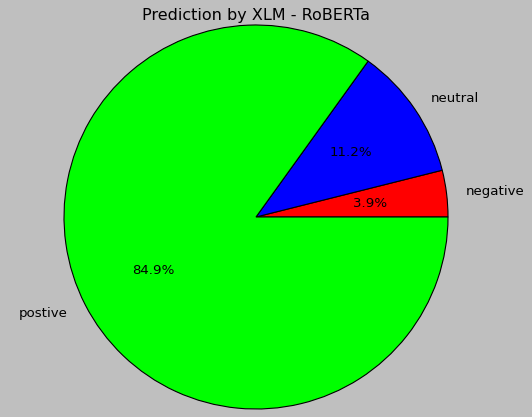

In [48]:
probabilities, predicted_label = predict_xlmRoberta(input(), model, text_transform, label_map)

colors = ['#FF0000', '#0000FF', '#00FF00']
percentages = probabilities * 100
plt.pie(percentages, labels=label_map.values(), autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('Prediction by XLM - RoBERTa')
plt.show()